In [24]:
import os
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

In [25]:
root_path = "../../Data/Experiment_2"

In [66]:
data = {p.split("/")[-1].split(".")[0]: np.load(p) for p in glob(os.path.join(root_path, "*npy")) if "bgs" not in p}
for k, v in data.items():
    print(f"{k}: {v.shape}")

yellow_blue: (5, 21, 256, 256, 3)
red_green: (5, 21, 256, 256, 3)
achrom: (5, 20, 256, 256, 3)


In [76]:
bgs = {p.split("/")[-1].split(".")[0][4:]: np.load(p) for p in glob(os.path.join(root_path, "*npy")) if "bgs" in p}
for k, v in bgs.items():
    print(f"{k}: {v.shape}")

yellow_blue: (5, 256, 256, 3)
achrom: (5, 256, 256, 3)
red_green: (5, 256, 256, 3)


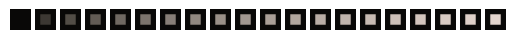

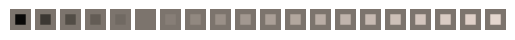

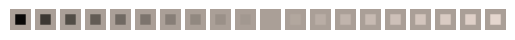

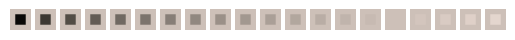

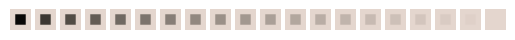

In [77]:
for row in data["achrom"]:
    fig, axes = plt.subplots(1,len(row))
    for ax, s in zip(axes.ravel(), row):
        ax.imshow(s)
        ax.axis("off")
plt.show()

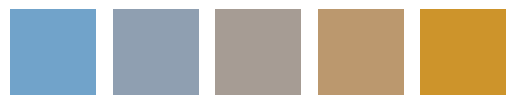

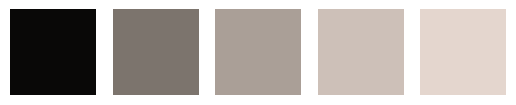

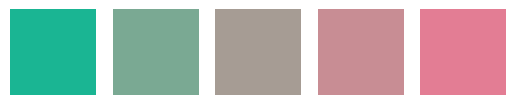

In [78]:
for k, v in bgs.items():
    fig, axes = plt.subplots(1, len(v))
    for ax, s in zip(axes.ravel(), v):
        ax.imshow(s)
        ax.axis("off")
plt.show()

In [79]:
def model(img):
    return img
def calculate_diffs(img1, img2):
    a, b = model(img1), model(img2)
    return ((a-b)**2).mean(axis=(1,2,3))**(1/2)

In [80]:
diffs = {}
for c in ["achrom", "red_green", "yellow_blue"]:
    diffs[c] = []
    data_ = data[c]
    bgs_ = bgs[c]
    for cc, bg in zip(data_, bgs_):
        diff = calculate_diffs(cc, bg[None,...])
        diffs[c].append(diff)
diffs = {k: np.array(v) for k, v in diffs.items()}

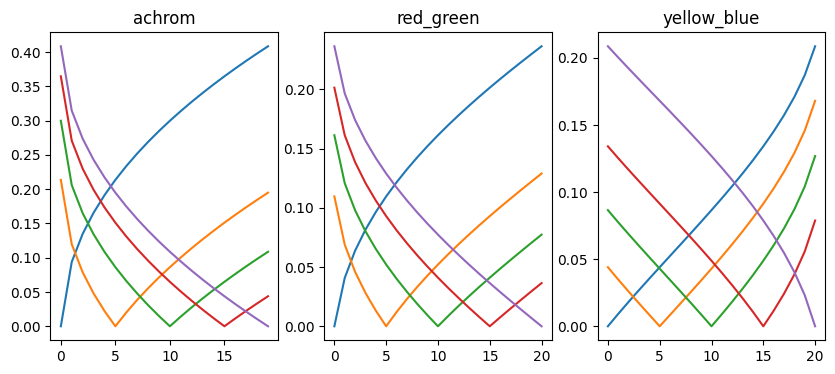

In [81]:
fig, axes = plt.subplots(1,3, figsize=(10,4))
for (k, v), ax in zip(diffs.items(), axes.ravel()):
    ax.set_title(k)
    for c in v:
        ax.plot(c)
plt.show()